In [1]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from functools import partial

from accuracy_bounds.data.generator_functions import random_uni_points_in_ball
from accuracy_bounds.utils.visualizations import plot_wckersize_conv, plot_avkersize_conv, visualize_ball_3d
from accuracy_bounds.algo.kernel_size import compute_wc_kernel_size, compute_av_kernel_size
from accuracy_bounds.algo.projections import apply_forwardmodel
from accuracy_bounds.data.dataset import GeneratorDataset
from accuracy_bounds.utils.utils import set_seed

### **Example 1:** Worst Case and Average Kernel Size on Linear Forward Model on 3D Ball 

In [ ]:
# Number of points in for the dataset M_1
num_points = 1500

# Radiums, Center and Dimension of ball
radius = 2
center = (0,0,0)
dim = 3

# Threshold for noise on M_1
epsilon=1e-1

# Random seed
seed = 43

set_seed(seed)


#### Collect Data

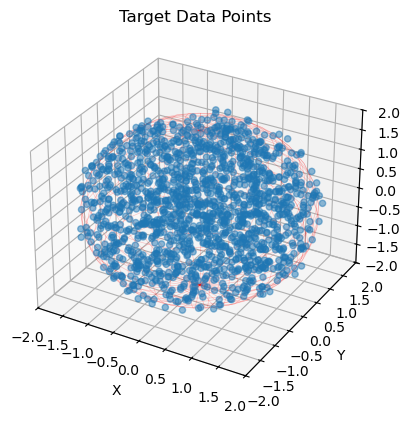

In [ ]:
# Get num_points in ball with radius r+eps sampled with a uniform distribution
target_data = random_uni_points_in_ball(num_points=num_points, radius=radius+epsilon, center=center, dim=3)        

# Plot points to visualize sampling
visualize_ball_3d(points=target_data, radius=radius, center=center, title="Target Data Points")

### Setup Linear Forward Operator and analytical Kernel Size

In [ ]:
# Linear forward model (a matrix with a non-trival kernel)
A = np.diag([1, 1, 0])  

# analytical wc kersize for ball around 0 with radius r+epsilon
wc_kernel_size_analytical = 2*radius+2*epsilon

#analytical av kersize for ball around 0 with radius r+epsilon sampled with uniform distribution (this amounts to the Lebesgue integral)
av_kernel_size_analytical = np.power((radius+epsilon),1/3)

# Distance measure
p=2
q=2

# get data in M_2 (measurement data)
input_data = apply_forwardmodel(A, target_data)

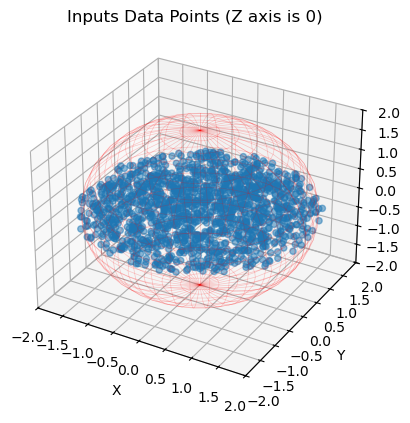

In [12]:
# Visulaize measuremnt data
visualize_ball_3d(points=input_data, radius=radius, center=center, title="Inputs Data Points (Z axis is 0)")

### Setup Worst-Case Kernal Size Computation

In [ ]:
# Maximum number of samples in the measurement space
max_k = 300

# Maximum number of 
input_target_pairs = 500

##### Compute Worst-Case Kernel Size

WC-Kernel Size: 3.7026114777312555


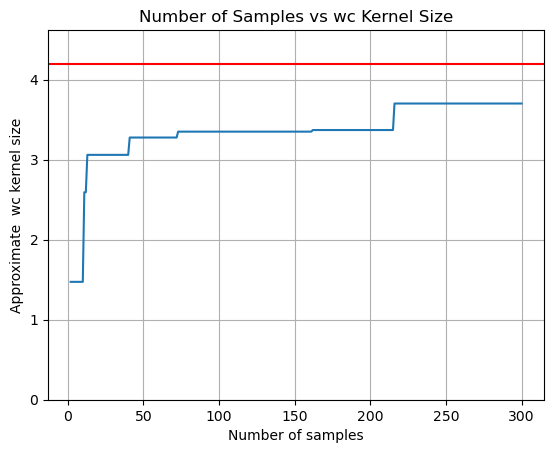

Total Max Kernel Size: 3.7026114777312555
Analytical Kernel Size: 4.2
Relative Error: -0.11842583863541538


In [7]:
wc_kersizes = compute_wc_kernel_size(A, input_data[:input_target_pairs], target_data[:input_target_pairs], p, q, epsilon, max_k)
wc_kersize_final = wc_kersizes[-1]

plot_wckersize_conv(wc_kersize_final, wc_kersizes, wc_kernel_size_analytical, max_k)


### Setup Average-Kernal Size Computation

In [ ]:
# Maximum number of samples of measurement data
max_k = 150
input_target_pairs = 1000

AV-Kernel Size: 1.3420790754413534


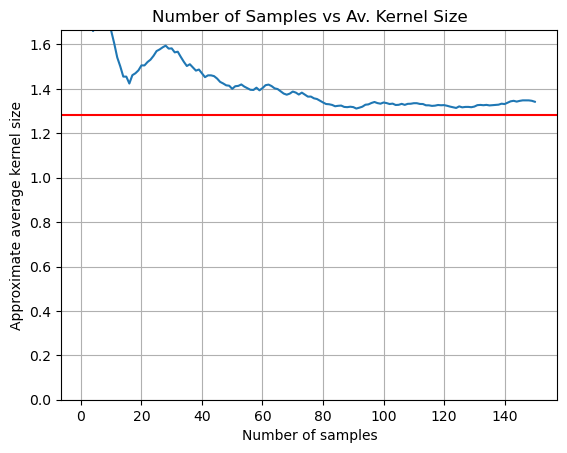

Total Max Kernel Size: 1.3420790754413534
Analytical Kernel Size: 1.2805791649874942
Relative Error: 0.048025075009290624


In [9]:

av_kersizes = compute_av_kernel_size(A, input_data[:input_target_pairs], target_data[:input_target_pairs], p, q, epsilon, max_k)

av_kersizef = av_kersizes[-1]

plot_avkersize_conv(av_kersizef, av_kersizes, av_kernel_size_analytical, max_k)